In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
plt.style.use(['ggplot'])

# Create Data

In [4]:
def create_data(m, q):
    
    X = 2*np.random.rand(100,1)
    y = q + m * X+np.random.randn(100,1)
    
    return X, y

def show_data(X, y):
    plt.figure()
    plt.plot(X,y,'b.')
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)

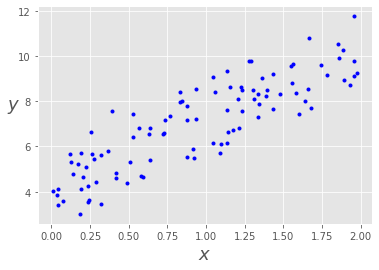

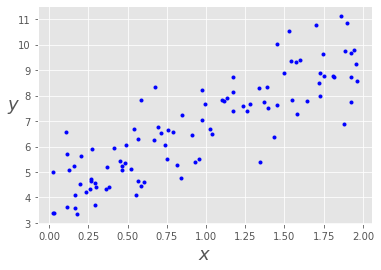

In [5]:
m = 3
q = 4
data1 = create_data(m, q)
data2 = create_data(m, q)

show_data(*data1)
show_data(*data2)

#  Analytical way of Linear Regression

In [6]:
def linear_regr(X, y):
    X_b = np.c_[np.ones((100,1)),X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    print(theta_best)
    return theta_best

In [7]:
regr1 = linear_regr(*data1)
regr2 = linear_regr(*data2)

[[4.22215108]
 [2.96846751]]
[[4.10189775]
 [2.77998374]]


In [8]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        
    return theta, theta_history
        
    
def gradient_descent_step(X,y,theta,learning_rate=0.01):
 
    m = len(y)
    prediction = np.dot(X,theta)
    theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        
    return theta
        

In [18]:
lr =0.01
n_iter = 200

np.random.seed(0)
theta_avg = np.random.randn(2,1)
print('Starting weights:') 
print(theta_avg)

arr_theta_avg = []
arr_theta_1 = []
arr_theta_2 = []


for i in range(n_iter):
    
    X1 = np.c_[np.ones((len(data1[0]),1)),data1[0]]
    theta1 = gradient_descent_step(X1, data1[1],theta_avg,lr)
    arr_theta_1.append(theta1)
    
    X2 = np.c_[np.ones((len(data2[0]),1)),data2[0]]
    theta2 = gradient_descent_step(X2, data2[1],theta_avg,lr)
    arr_theta_2.append(theta2)
    
    theta_avg = (theta1+theta2)/2
    arr_theta_avg.append(theta_avg)

Starting weights:
[[1.76405235]
 [0.40015721]]


In [19]:
lr =0.01
n_iter = 200

np.random.seed(0)
theta_avg = np.random.randn(2,1)
print('Starting weights:') 
print(theta_avg)

arr_agg_theta_avg = []
arr_agg_theta_1 = []
arr_agg_theta_2 = []


for i in range(n_iter):
    
    X1 = np.c_[np.ones((len(data1[0]),1)),data1[0]]
    theta1 = gradient_descent_step(X1, data1[1],theta_avg,lr)
    arr_agg_theta_1.append(theta1)
    
    X2 = np.c_[np.ones((len(data2[0]),1)),data2[0]]
    theta2 = gradient_descent_step(X2, data2[1],theta1, lr)
    arr_agg_theta_2.append(theta2)
    
    theta_avg = theta2
    arr_agg_theta_avg.append(theta_avg)

Starting weights:
[[1.76405235]
 [0.40015721]]


In [36]:
def plot_gd_iteration(theta_avg, theta_agg_avg, theta1, theta2, arr_agg_theta_1,  data1, data2):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    ax1.plot(*data1, 'b.', alpha=0.3)
    ax1.plot(*data2, 'r.', alpha=0.3)
    a = np.array([0, 2])
    b = theta1[0] + theta1[1]*a
    c = theta2[0] + theta2[1]*a
    d = theta_avg[0] + theta_avg[1]*a

    ax1.plot(a,b, label='user 1', color='tab:blue')
    ax1.plot(a,c, label='user 2', color='tab:green')
    ax1.plot(a,d, label='average', color='tab:red')
    ax1.legend()
    
    ax2.plot(*data1, 'b.', alpha=0.3)
    ax2.plot(*data2, 'r.', alpha=0.3)
    a = np.array([0, 2])
    b = arr_agg_theta_1[0] + arr_agg_theta_1[1]*a
    #c = theta2[0] + theta2[1]*a
    d = theta_agg_avg[0] + theta_agg_avg[1]*a

    ax2.plot(a,b, label='user 1', color='tab:blue')
    #plt.plot(a,c)
    ax2.plot(a,d, label='user 2', color='tab:red')
    ax2.legend()
    plt.show()

Iteration 0


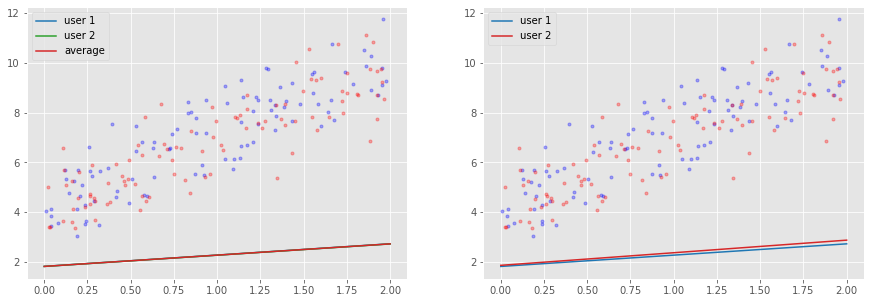

Iteration 1


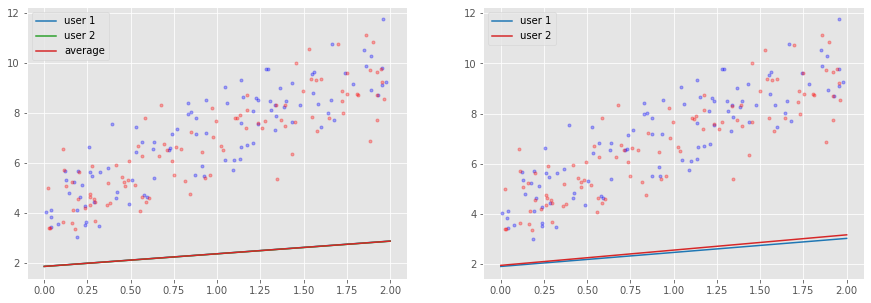

Iteration 2


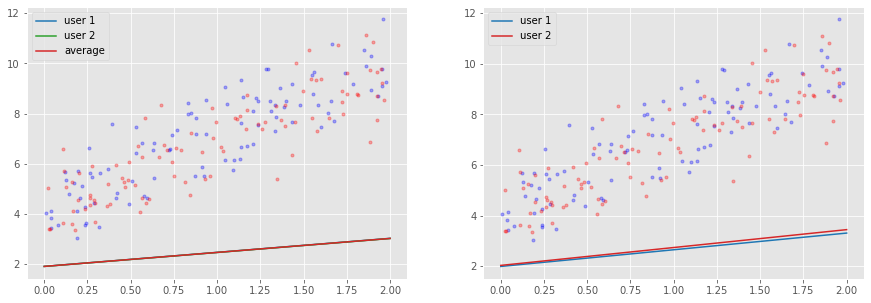

Iteration 3


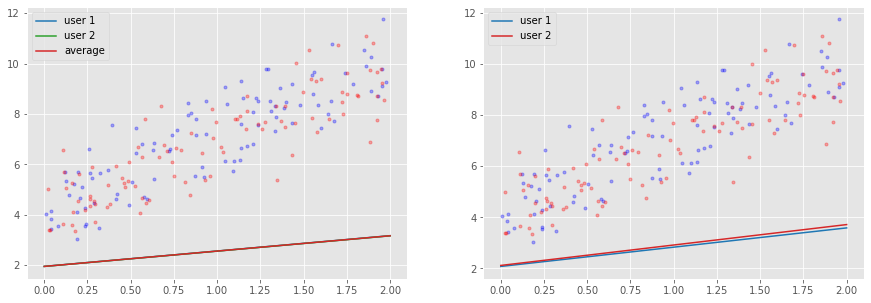

Iteration 4


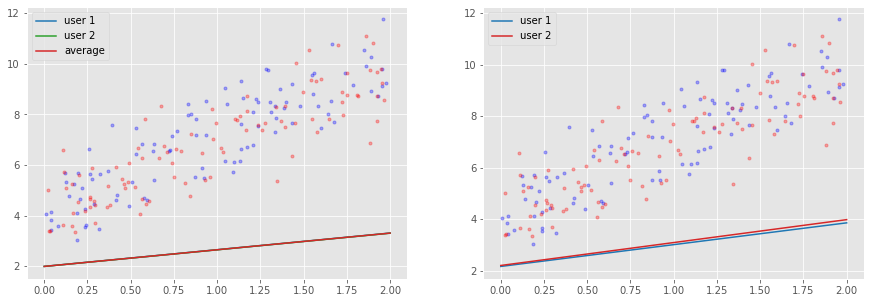

In [37]:
for i in range(len(arr_theta_avg)):
    print("Iteration " + str(i))
    plot_gd_iteration(arr_theta_avg[i], arr_agg_theta_avg[i], arr_theta_1[i], arr_theta_2[i], arr_agg_theta_1[i], data1, data2)

In [ ]:
todo

inserire caso non FL
assi x e y